# First models

## Data Preparation

The first step of all modeling is the preparation and loading of the data. In our case, the MNIST problem, which consists of a large database of written digits and is so common that it has become a paradigmatic example within Machine Learning.

The pre-processing work required to be able to apply a model to this problem is not minor but, fortunately, Keras provides a direct instruction to download the images representing the thousands of handwritten digits (already with a unified format of 28x28 pixels in grayscale).

In order to load the data that Keras brings as an example, you have to follow two steps: first, load the Keras library that provides the tools to work with the specific dataset (which is usually in the package keras.datasets, in this case called mnist); and, second, execute the process of loading the data (the library provides the function load_data()). It must be taken into account that the first time this process is carried out, the data is downloaded from a repository that comes by default predefined in that package, since, due to its size, it is not installed together with the library, but only when the user needs it:

In [1]:
from tensorflow.keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

We can explore a bit how each of these variables are by using specific Python instructions that give us information about their structure and show the first values:


In [2]:
train_data.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_data.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

If we want to see some of the images in the dataset, we can make use of the appropriate instruction from, for example, the matplotlib library:

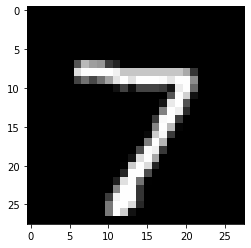

In [8]:
from matplotlib import pyplot as plt

plt.imshow(test_data[0],cmap='gray')


The workflow is similar to the one that is always followed in the Supervised ML processes, and which we have analyzed in the previous term:
- We show the model (a neural network, in our case) the training data, train_data and train_labels.
- The model must learn to associate the images with the associated labels.
- Finally, we verify the learning done by checking on test_data that the answers given by the model (predictions) coincide with those stored in test_labels.



## Model Definition

We are already in a position to define a neural network that will consume the above data to see if we are able to provide a first solution to the problem of handwritten digit recognition. As we are only making a first approximation to Keras, the defined network will be very basic, with only one input and one output layer:
- We are going to place an input layer with 784 (= 28 * 28) neurons (which will receive each of the 784 pixels of each image), with ReLU activation function, and
- an output layer with 10 neurons (one neuron for each of the possible output labels), and with softmax activation (so it can be interpreted as an output probability that indicates how likely it is that the input image will have each of the labels as output):



In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

nn = models.Sequential()
nn.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
nn.add(layers.Dense(10, activation='softmax'))

nn.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
plot_model(nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In addition to neurons, which are the atomic units that make up a neural network, from a functional point of view, the basic element of neural networks is what is known as a layer, a processing module formed by a set of equal neurons that can be interpreted as a "filter" of data.

Most of Deep Learning, and where it is demonstrating an added value with respect to the other existing ML models, consists of concatenating simple layers (and, possibly, with specific differentiated functionalities) to obtain a computing device that processes data progressively.

In the case of the network we have defined, this device consists of a sequence of two dense layers, which are totally connected neural layers. The second (and last) layer is a "softmax" layer of 10 outputs, which means that it will return a probability vector of 10 values (i.e. 10 values in [0, 1] that add up to 1). Each of these values will interpret the probability that the current image belongs to one of the 10 classes (the digits from 0 to 9).

So far we have only defined the structure of the network, but we have not given any information about how the training will be carried out. To do this we have to tell Keras some additional features, such as the optimizer that will allow us to modify the weights of the net, which target (error) function will be used to drive this optimization, and the metrics that we will use to measure how the net behaves as it is trained.

Keras provides the compile function that allows you to set these (and other) properties on an already defined network:


In [11]:
nn.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Since the neural network we are going to use must receive as input data each image in a flattened form (i.e. not as a 28x28 matrix, but as a 28x28=784 position vector), our first step is to make use of the instructions provided by Keras to transform the form of the input data.

In addition, we will take advantage to normalize the content of these images (they are in grayscales with uint8 values between 0 and 255, and we will pass them to float32 values in [0, 1]), something advisable when working with this type of models:

In [12]:
train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255

In addition, we will convert the tags (which come in the dataset as integer values), into binary vectors to correspond to the output that our network can provide:


In [13]:
from tensorflow.keras.utils import plot_model, to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Fitting

Once the data is prepared and the network is defined (structure and functionality), we can make use of the fit instruction to start the training process on the data we have. Essentially, we have to indicate on which data to train (input and output), how many iterations (epochs) and with which batch size (how often the algorithm updates the weights).

During the training process, Keras informs about the values that the objective function takes, as well as the metric/s that we have set in the compilation.

In [15]:
nn.fit(train_data, train_labels, epochs=50, batch_size=128)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2510 - accuracy: 0.9273
Epoch 2/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1018 - accuracy: 0.9700
Epoch 3/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0677 - accuracy: 0.9797
Epoch 4/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0488 - accuracy: 0.9852
Epoch 5/50
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0364 - accuracy: 0.9891
Epoch 6/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0280 - accuracy: 0.9915
Epoch 7/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0214 - accuracy: 0.9937
Epoch 8/50
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0171 - accuracy: 0.9950
Epoch 9/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0126 - accuracy: 0.9964
Epoch 10/50
60

We must keep in mind that the values shown are the error and metrics calculated on the training data itself. However, since the goal of a learning model is to generalize well on data that the training process has not seen before, we need the test set to evaluate how the network behaves on examples it has not used to fit.

On the training data we quickly reach an accuracy of 0.989 (i.e. 98.9%), but let's see how well it behaves on the test data (that it has not used to learn):


In [16]:
test_loss, test_acc = nn.evaluate(test_data, test_labels)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.1391 - accuracy: 0.9846


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9846


# Mini Exercise

use the Image that you can find in the drive, and make a prediction with it.

## Exercise




This example has was not created taking into account the general ML workflow that was explained in class. We have a model that has statistical power. so, following the universal ml workflow:
1. defining the problem and assembling a dataset (done)
2. choose a measure of success (done, but can be changed)
3. Deciding on an evaluation protocol (done, but can be changed)
4. preparing your data (done)
5. Developing first model (done)
6. scaling up (not done)
7. regularizing the model (not done)
8. tuning hyperparameters (not done) (use GridSearchCV)


> https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


9. validating the model (done, but must be re-done)

Please, finalize the ML workflow in order to match the universal ML workflow.